# Overview
Plot the percentage fused against the max fusion length for each file

In [24]:
import numpy as numpy
import matplotlib.pyplot as plt
import pandas as pd
import math

In [25]:
df = pd.read_csv("/Users/elizabeth/Desktop/Cambridge/Dissertation/data results/overview.csv")

In [26]:
df.head()

,file,fusable,end,max_fusable_length,total_instructions,instructions_after_fuse,instructions_fused,percentage_fused,average_fusion_length
0,astar,ARITHMETIC,MEMORY,0,25769656585,19063903215,6705753370,26.021897,1.351751
1,bzip2,ARITHMETIC,MEMORY,0,25744932143,18817268336,6927663807,26.908845,1.368155
2,gobmk,ARITHMETIC,MEMORY,0,55301273534,40858480785,14442792749,26.116564,1.353483
3,h264ref,ARITHMETIC,MEMORY,0,104176346385,77114669652,27061676733,25.976796,1.350928
4,hmmer,ARITHMETIC,MEMORY,0,21910561732,16601169470,5309392262,24.232114,1.319820


In [27]:
df.columns

Index(['file', 'fusable', 'end', 'max_fusable_length', 'total_instructions',
       'instructions_after_fuse', 'instructions_fused', 'percentage_fused',
       'average_fusion_length'],
      dtype='object')

In [28]:
grouped = df.groupby(['file', 'fusable', 'end'])

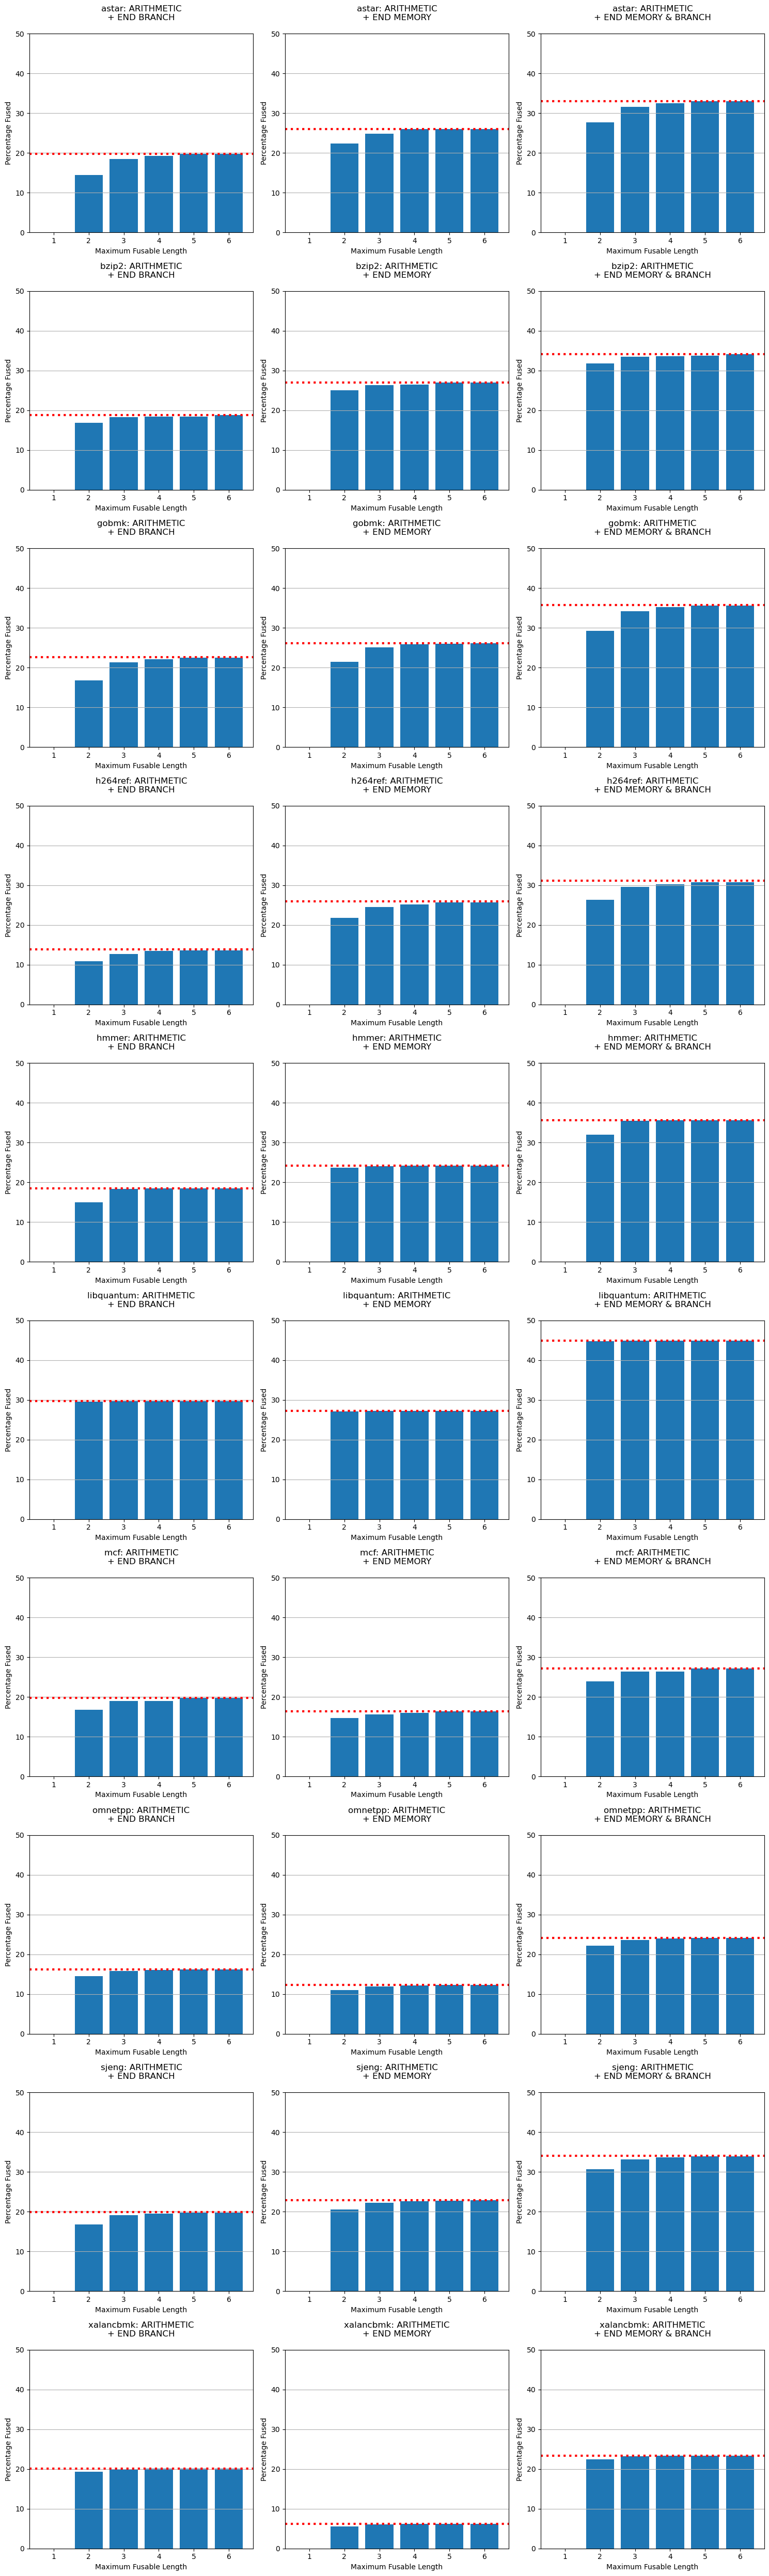

In [32]:
num_groups = len(grouped)
cols = 3
rows = math.ceil(num_groups / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, (group_name, group_data) in enumerate(grouped):
    group_title = (
        f"{group_name[0]}: "
        f"{group_name[1]}\n"
        f"+ END {group_name[2]}\n"
    )

    data = group_data.reset_index()
    first_value = data['percentage_fused'].iloc[0]
    axes[i].axhline(y=first_value, color='red', linestyle='dotted', linewidth=3)
    axes[i].bar(data['max_fusable_length'][1:7], data['percentage_fused'][1:7])
    axes[i].set_title(f'{group_title}')
    axes[i].set_xlabel('Maximum Fusable Length')
    axes[i].set_ylabel('Percentage Fused')
    axes[i].tick_params(axis='x')
    axes[i].grid(axis='y')
    axes[i].set_ylim(bottom=0, top=50)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()